In [ ]:
#pip install --upgrade git+https://github.com/flairNLP/flair.git


In [1]:
from flair.models import TextClassifier
from flair.data import Sentence
import pymongo
import preprocessor as p
from matplotlib import pyplot as plt 
from matplotlib.animation import FuncAnimation


client = pymongo.MongoClient(port = 27017)
db = client.Twitter
table1 = db.TrumpvsBiden
classifier = TextClassifier.load('sentiment-fast')
teamBiden=0
teamTrump=0

2020-09-13 13:44:40,127 loading file C:\Users\nidut\.flair\models\sentiment-en-mix-ft-rnn.pt


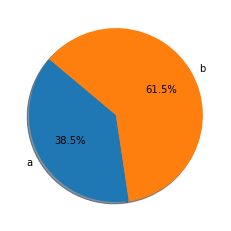

0.38484179543782193


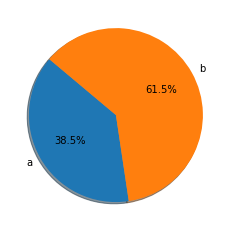

0.384700257447591


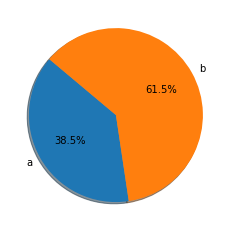

0.384700257447591


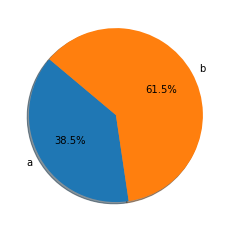

0.3845588235294118


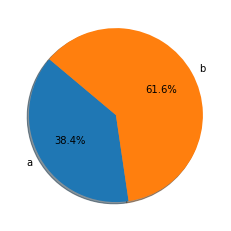

0.384417493568541


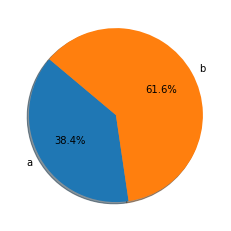

0.384417493568541


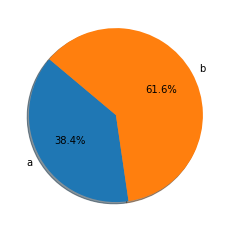

0.3842762674504041


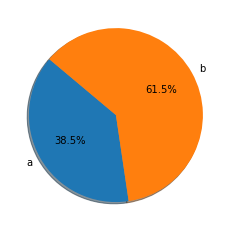

0.38450238707308115


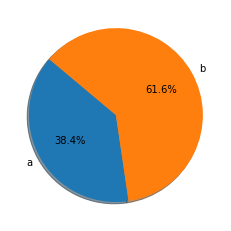

0.3843612334801762


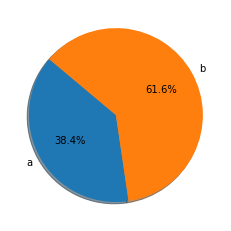

0.3843612334801762


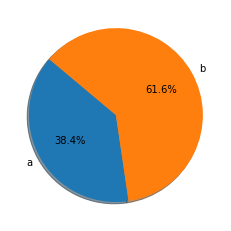

0.3843612334801762


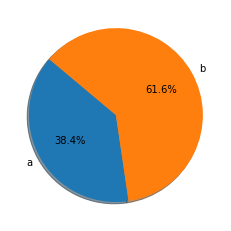

0.3843612334801762


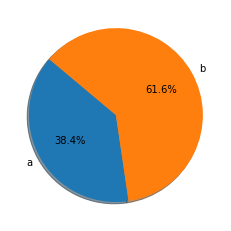

0.3843612334801762


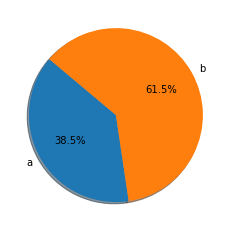

0.38458715596330273


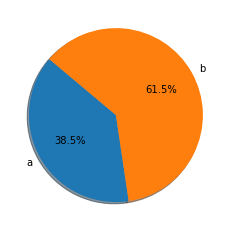

0.38458715596330273


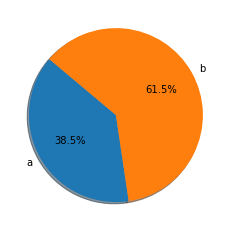

0.38458715596330273


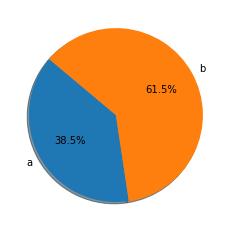

0.3848129126925899


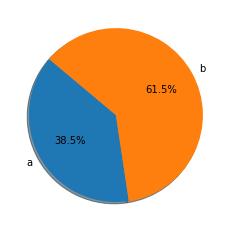

0.3848129126925899


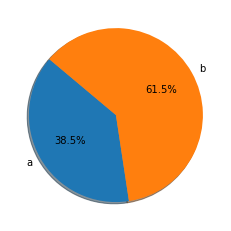

0.385038503850385


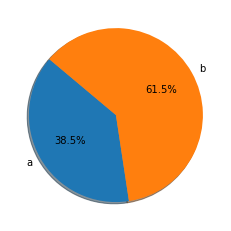

0.385038503850385


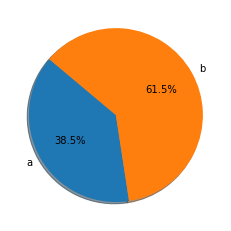

0.3852639296187683


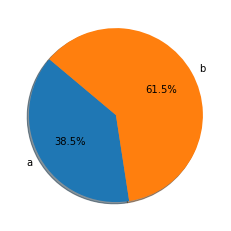

0.38548919017955297


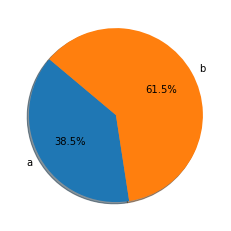

0.38548919017955297


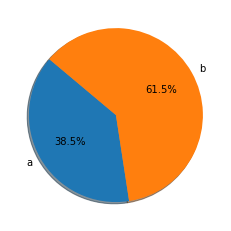

0.38534798534798537


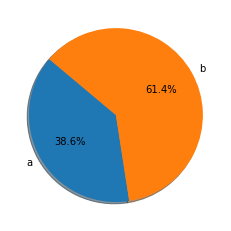

0.38557305016477483


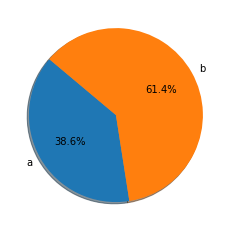

0.3857979502196193


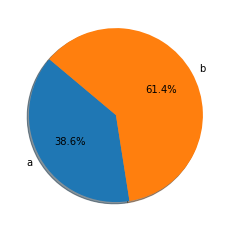

0.3860226856933772


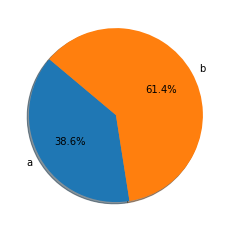

0.3860226856933772


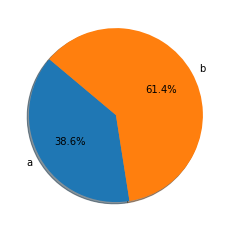

0.3860226856933772


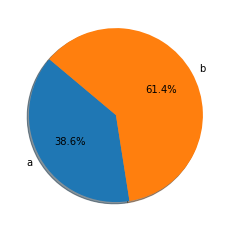

0.3860226856933772


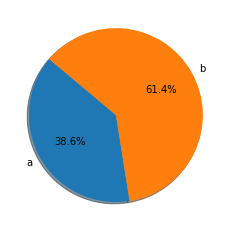

0.3862472567666423


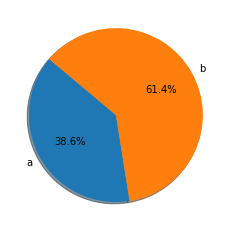

0.3862472567666423


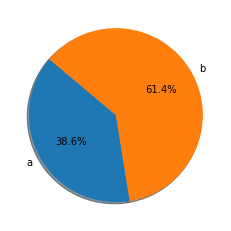

0.38647166361974405


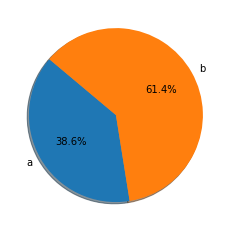

0.38633040935672514


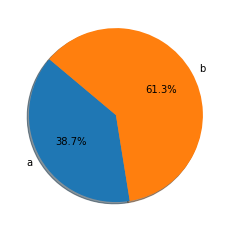

0.3865546218487395


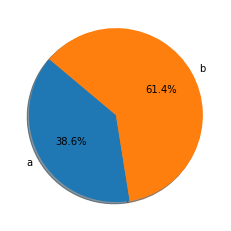

0.38641344046749454


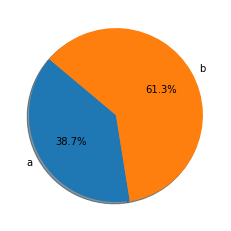

0.38663745892661555


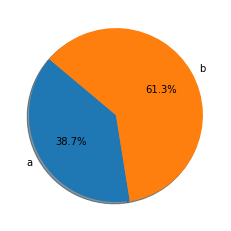

0.38663745892661555


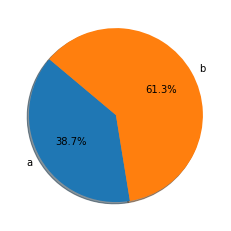

0.38686131386861317


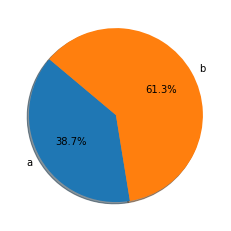

0.38686131386861317


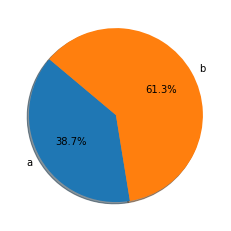

0.38686131386861317


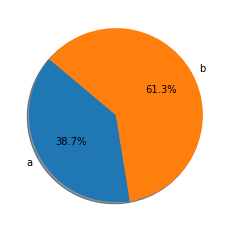

0.3867201751185699


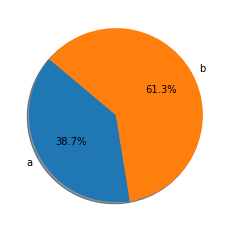

0.3867201751185699


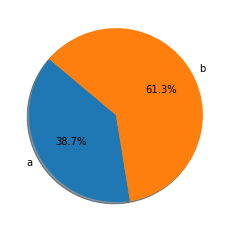

0.38694383661560905


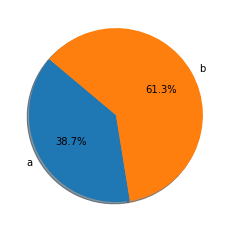

0.38680277068902663


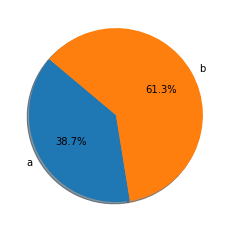

0.38680277068902663


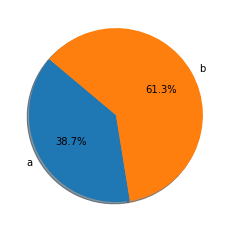

0.38680277068902663


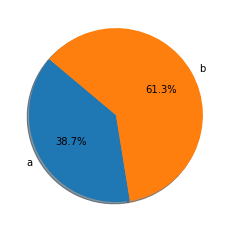

0.38680277068902663


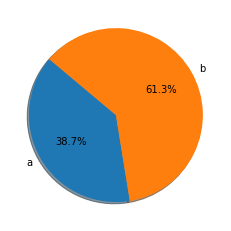

0.38666180758017493


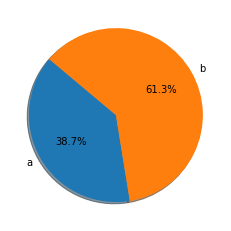

0.38666180758017493


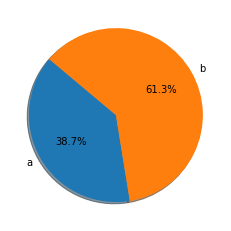

0.38666180758017493


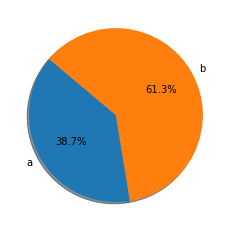

0.38688524590163936


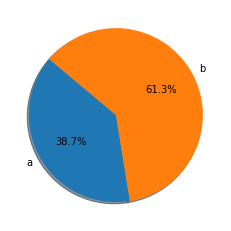

0.38674435542607427


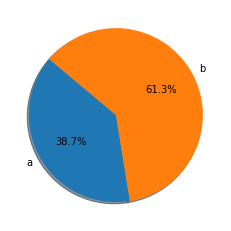

0.38674435542607427


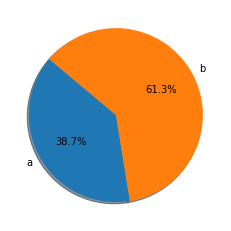

0.38674435542607427


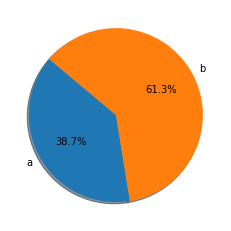

0.38674435542607427


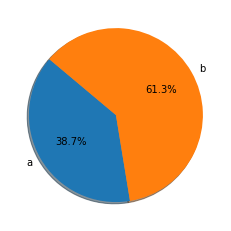

0.3869676010192938


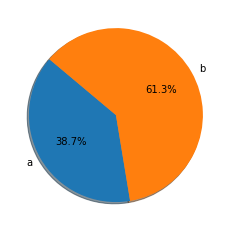

0.38719068413391555


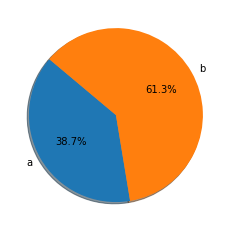

0.38719068413391555


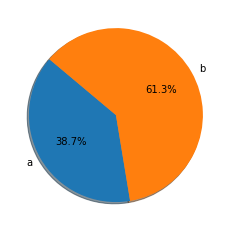

0.38719068413391555


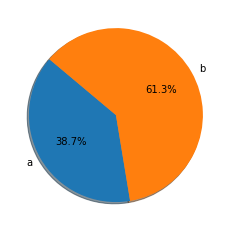

0.38719068413391555


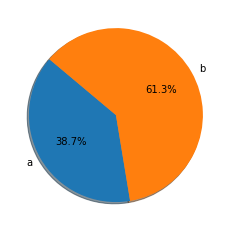

0.38719068413391555


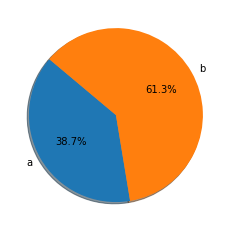

0.38719068413391555


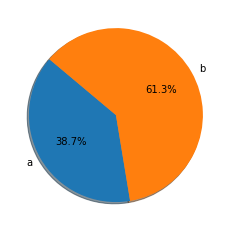

0.38719068413391555


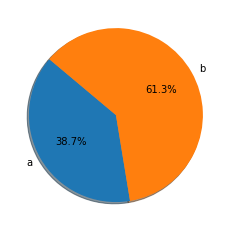

0.3870498363041106


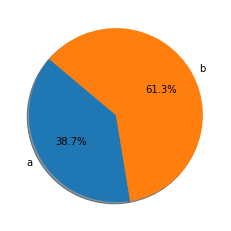

0.38727272727272727


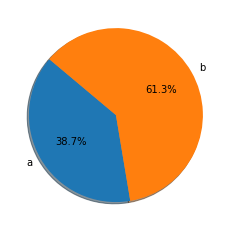

0.3874954561977463


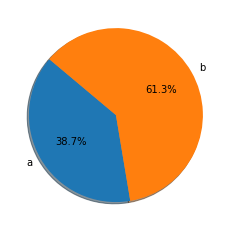

0.3874954561977463


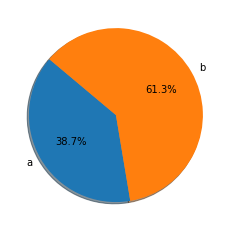

0.3874954561977463


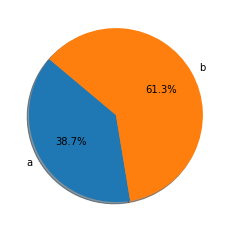

0.3873546511627907


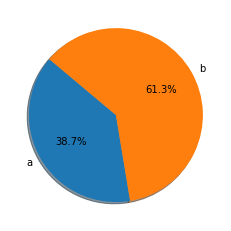

0.3872139484199056


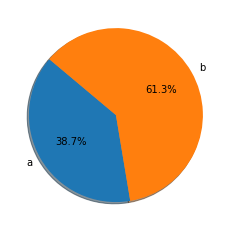

0.38743645606390703


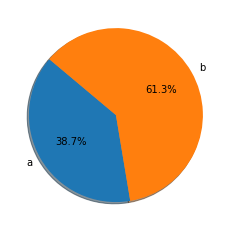

0.38743645606390703


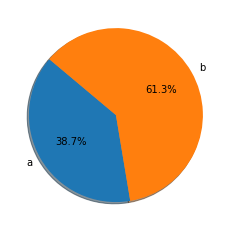

0.38743645606390703


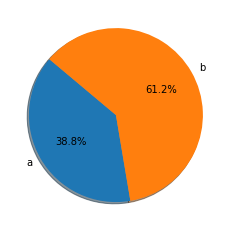

0.3876588021778584


KeyboardInterrupt: 

In [9]:
import matplotlib.animation as animation

with client.watch([{'$match': {'operationType': 'insert'}}]) as stream:
    for insert_change in stream:
        text=insert_change['fullDocument']['text']
        person=insert_change['fullDocument']['person']
        
        inputQuery=p.clean(text)
        #print(inputQuery)
        if(len(inputQuery)!=0):
            sentence = Sentence(inputQuery)
            classifier.predict(sentence)
            label = sentence.labels[0]
            confidence=label.score
            sentiment=label.value

            if person=='B':
                if sentiment=='POSITIVE' and confidence>=0.9:
                    teamBiden+=1
                elif sentiment=='NEGATIVE' and confidence>=0.9:
                    teamTrump+=1
                else:
                    pass
            else:
                if sentiment=='POSITIVE' and confidence>=0.9:
                    teamTrump+=1
                elif sentiment=='NEGATIVE' and confidence>=0.9:
                    teamBiden+=1
                else:
                    pass
            
            fig = plt.figure()
            ax1 = fig.add_subplot(1,1,1)
            labels=['a','b']
            def animate(i):
                nums=[teamTrump,teamBiden]
                ax.clear()
                ax1.pie(nums, labels=labels, 
                        autopct='%1.1f%%', shadow=True, startangle=140)
                
            ani = animation.FuncAnimation(fig, animate, interval=1000)
            plt.show()
            print(teamTrump/(teamTrump+teamBiden))


classifier = TextClassifier.load('sentiment-fast')
